In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 파일 읽어오기
hospital = pd.read_csv('병원정보서비스 2021.12.csv', encoding='cp949')
hospital.head()

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,x좌표,y좌표
0,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경북대학교병원,1,상급종합,230000,대구,230006,대구중구,NaN,41944,...,0,0,0,1,0,0,0,0,128.604125,35.866774
1,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,계명대학교동산병원,1,상급종합,230000,대구,230007,대구달서구,신당동,42601,...,3,0,0,2,0,0,0,0,128.480131,35.853886
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경희대학교병원,1,상급종합,110000,서울,110007,동대문구,NaN,2447,...,0,0,0,0,0,0,0,0,127.051852,37.594119
3,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,한양대학교병원,1,상급종합,110000,서울,110011,성동구,NaN,4763,...,0,2,4,7,0,0,0,0,127.044134,37.559657
4,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,학교법인 고려중앙학원 고려대학교의과대학부속병원(안암병원),1,상급종합,110000,서울,110012,성북구,NaN,2841,...,0,4,10,8,0,0,0,0,127.026354,37.587016


In [3]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74756 entries, 0 to 74755
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   암호화요양기호     74756 non-null  object 
 1   요양기관명       74756 non-null  object 
 2   종별코드        74756 non-null  int64  
 3   종별코드명       74756 non-null  object 
 4   시도코드        74756 non-null  int64  
 5   시도코드명       74756 non-null  object 
 6   시군구코드       74756 non-null  int64  
 7   시군구코드명      74756 non-null  object 
 8   읍면동         29872 non-null  object 
 9   우편번호        74756 non-null  int64  
 10  주소          74756 non-null  object 
 11  전화번호        74411 non-null  object 
 12  병원URL       9001 non-null   object 
 13  개설일자        74710 non-null  object 
 14  총의사수        74756 non-null  int64  
 15  의과일반의 인원수   74756 non-null  int64  
 16  의과인턴 인원수    74756 non-null  int64  
 17  의과레지던트 인원수  74756 non-null  int64  
 18  의과전문의 인원수   74756 non-null  int64  
 19  치과일반의 인원수   74756 non-nul

In [11]:
# 1. 지역별 상급종합병원의 수, 시각화
tertiary = hospital[hospital.종별코드==1]

# 상급종합병원의 수
g_tertiary_count = tertiary.groupby('시도코드명').size().sort_values(ascending=False)
g_tertiary_count

시도코드명
서울    14
경기     5
대구     5
경남     3
부산     3
인천     3
강원     2
광주     2
전북     2
충남     2
대전     1
울산     1
전남     1
충북     1
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

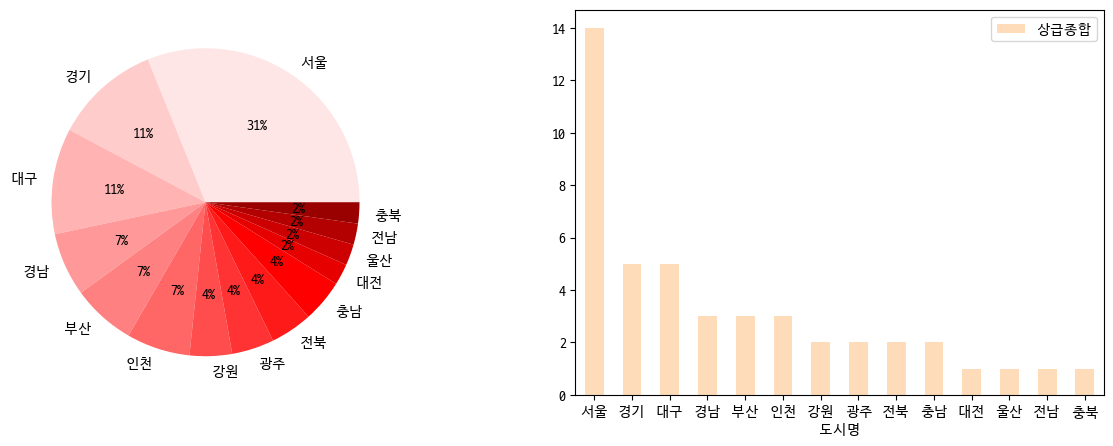

In [50]:
# 시각화
plt.rc('font', family='D2coding')

fig, ax = plt.subplots(1, 2)

g_tertiary_count.plot(
    kind='pie',
    figsize=(10,10),
    ax=ax[0], 
    autopct='%.f%%',
#     colors=['#ffe6e6', '#ffcccc', '#ffb3b3', 
#             '#ff9999', '#ff8080', '#ff6666', 
#             '#ff4d4d','#ff3333', '#ff1a1a', 
#             '#ff0000', '#e60000', '#cc0000', 
#             '#b30000', '#990000'],
    colormap='Reds'
)

g_tertiary_count.plot(
    kind='bar',
    figsize=(15,5),
    ax=ax[1],
    color='#fedcba',
    label='상급종합',
    legend=True,
    xlabel='도시명',
    rot=0, # 눈금 회전 설정
)

# ax[1].set_xticklabels(g_tertiary_count.index, rotation=0) # 눈금 회전 설정
plt.show

In [13]:
hospital_info = hospital.loc[hospital.종별코드명.isin(['상급종합']), ['시도코드명', '종별코드명']]
hospital_info[:2]

,시도코드명,종별코드명
0,대구,상급종합
1,대구,상급종합


In [14]:
# 작업할 때 컬럼명은 이해하기 쉬운 이름으로 변경
hospital_info.columns = ['도시명', '병원 수']
hospital_info.columns

Index(['도시명', '병원 수'], dtype='object')

In [17]:
# hospital_info.병원 수 # 컬럼명에 띄어쓰기가 들어가면 via 사용 불가

SyntaxError: invalid syntax (2374563257.py, line 1)

In [22]:
hospital_info.groupby('도시명').value_counts() # 상급종합데이터만 추출했기 때문에 컬럼명을 입력하지 않아도 value_counts사용가능

도시명  병원 수
강원   상급종합     2
경기   상급종합     5
경남   상급종합     3
광주   상급종합     2
대구   상급종합     5
대전   상급종합     1
부산   상급종합     3
서울   상급종합    14
울산   상급종합     1
인천   상급종합     3
전남   상급종합     1
전북   상급종합     2
충남   상급종합     2
충북   상급종합     1
Name: count, dtype: int64

In [24]:
hospital_info_count = hospital_info.groupby('도시명').value_counts().unstack()
hospital_info_count[:2]

병원 수,상급종합
도시명,
강원,2
경기,5


In [61]:
hospital_info_count.columns

Index(['상급종합'], dtype='object', name='병원 수')

In [34]:
# 기존 데이터는 다른 형태로 쓰일 수 있으니 원본은 유지하고 그래프 그릴 변수 생성
graph = hospital_info_count.sort_values('상급종합', ascending=False)
graph

병원 수,상급종합
도시명,
서울,14
경기,5
대구,5
경남,3
부산,3
인천,3
강원,2
광주,2
전북,2


In [47]:
help(graph.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |

<Axes: xlabel='도시명'>

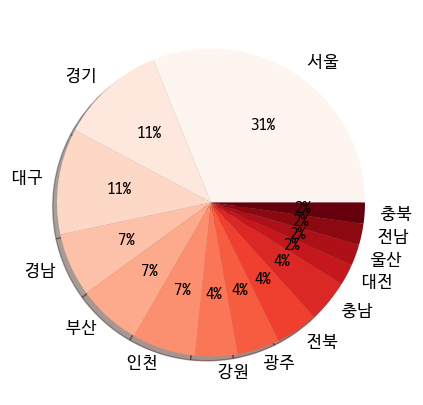

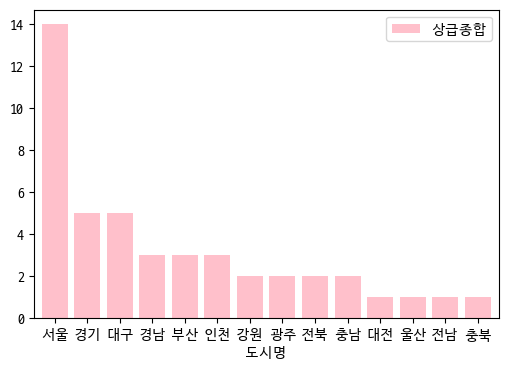

In [58]:
graph.plot(
    kind='pie',
    subplots=True,
    figsize=(5, 5),
    legend=False,
    ylabel='',
    autopct='%.f%%',
    fontsize=12,
    shadow=True,
    colormap='Reds'
)

graph.plot(
    kind='bar',
    rot=0,
    y='상급종합', # 병원 수가 컬럼의 name으로 들어가 name이 범례의 title로 설정됨
    figsize=(6, 4),
    color='pink',
    width=0.8
)

- 2021년 12월 기준으로 상급종합병원은 전국적으로 45개가 있으며, 이 중 31%에 해당하는 14개 병원은 서울에 위치하고 있다.  
  광역지방자치단체 중 경상북도, 세종특별자치시, 제주특별자치도에는 상급종합병원이 없다.
  <br><br>
- 암이나 이식 수술 등을 위해서는 상급종합병원이 많은 서울에 거주할 수 밖에 없다.